In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#osha_2021 = pd.read_csv(...OSHA 2021 Data.csv', low_memory=False)

In [3]:
#osha_2022 = pd.read_csv(...OSHA 2022 Data.csv', low_memory=False)

In [4]:
#osha_2023 = pd.read_csv(....OSHA 2023 Data.csv', low_memory=False)

In [5]:
combined_osha = pd.concat([osha_2023, osha_2022, osha_2021], join='outer', ignore_index=True)
combined_osha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040149 entries, 0 to 1040148
Data columns (total 33 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   id                            1040149 non-null  int64  
 1   establishment_name            1040147 non-null  object 
 2   establishment_id              1040148 non-null  float64
 3   ein                           932578 non-null   object 
 4   company_name                  988862 non-null   object 
 5   street_address                1040140 non-null  object 
 6   city                          1040146 non-null  object 
 7   state                         1040149 non-null  object 
 8   zip_code                      1040148 non-null  float64
 9   naics_code                    1040149 non-null  int64  
 10  naics_year                    383159 non-null   float64
 11  industry_description          970490 non-null   object 
 12  establishment_type          

In [6]:
ca_data = combined_osha[combined_osha['state'] == 'CA'].copy()

In [7]:
ca_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108128 entries, 149 to 1040148
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            108128 non-null  int64  
 1   establishment_name            108128 non-null  object 
 2   establishment_id              108128 non-null  float64
 3   ein                           96828 non-null   object 
 4   company_name                  103040 non-null  object 
 5   street_address                108128 non-null  object 
 6   city                          108128 non-null  object 
 7   state                         108128 non-null  object 
 8   zip_code                      108128 non-null  float64
 9   naics_code                    108128 non-null  int64  
 10  naics_year                    40153 non-null   float64
 11  industry_description          99861 non-null   object 
 12  establishment_type            107713 non-null 

In [8]:
ca_data.head()

,id,establishment_name,establishment_id,ein,company_name,street_address,city,state,zip_code,naics_code,...,total_injuries,total_skin_disorders,total_respiratory_conditions,total_poisonings,total_hearing_loss,total_other_illnesses,created_timestamp,change_reason,year_filing_for,sector
149,2102006,"Better Way Services, Inc.",420821.0,264498745,"Better Way Services, Inc.","5329 office center court, #125",Bakersfield,CA,93309.0,624120,...,2.0,0.0,0.0,0.0,0.0,1.0,02JAN24:16:00:00,NaN,2023.0,Unknown
151,2102008,"Greenfields Turf, Inc.",742704.0,770046820,"Greenfields Turf, Inc.",42421 Oak Ave.,Greenfield,CA,93927.0,111421,...,0.0,0.0,0.0,0.0,0.0,0.0,02JAN24:16:02:00,NaN,2023.0,Unknown
166,2102023,FAAC/Viking Access Systems,1065671.0,NaN,FAAC International,631 Wald,"Irvine, CA",CA,92618.0,333519,...,0.0,0.0,0.0,0.0,0.0,0.0,02JAN24:16:11:00,NaN,2023.0,Unknown
169,2102026,Humboldt Community Access and Resource Center-...,928137.0,946107605,Humboldt Community Access & Resource Center (H...,"1707 E Street, Ste. 2",Eureka,CA,95501.0,624120,...,5.0,0.0,0.0,0.0,0.0,0.0,02JAN24:16:13:00,NaN,2023.0,Unknown
172,2102029,Humboldt Community Access and Resource Center-...,928173.0,946107605,Humboldt Community Access and Resource Center,139 Third Street,Eureka,CA,95501.0,624120,...,0.0,0.0,0.0,0.0,0.0,0.0,02JAN24:16:16:00,NaN,2023.0,Unknown


In [9]:
ca_data['company_name'].fillna('Unknown Company', inplace=True)
ca_data['industry_description'].fillna('Unknown Industry', inplace=True)
ca_data['total_injuries'].fillna(0, inplace=True)

In [10]:
ca_data['zip_code'].fillna(0, inplace=True)

In [11]:
ca_data['zip_code'] = ca_data['zip_code'].astype(int).astype(str)

In [12]:
numeric_columns = [
    'annual_average_employees', 'total_hours_worked', 'total_injuries', 
    'total_deaths', 'total_dafw_cases', 'total_djtr_cases'
]
for col in numeric_columns:
    ca_data[col] = pd.to_numeric(ca_data[col], errors='coerce')

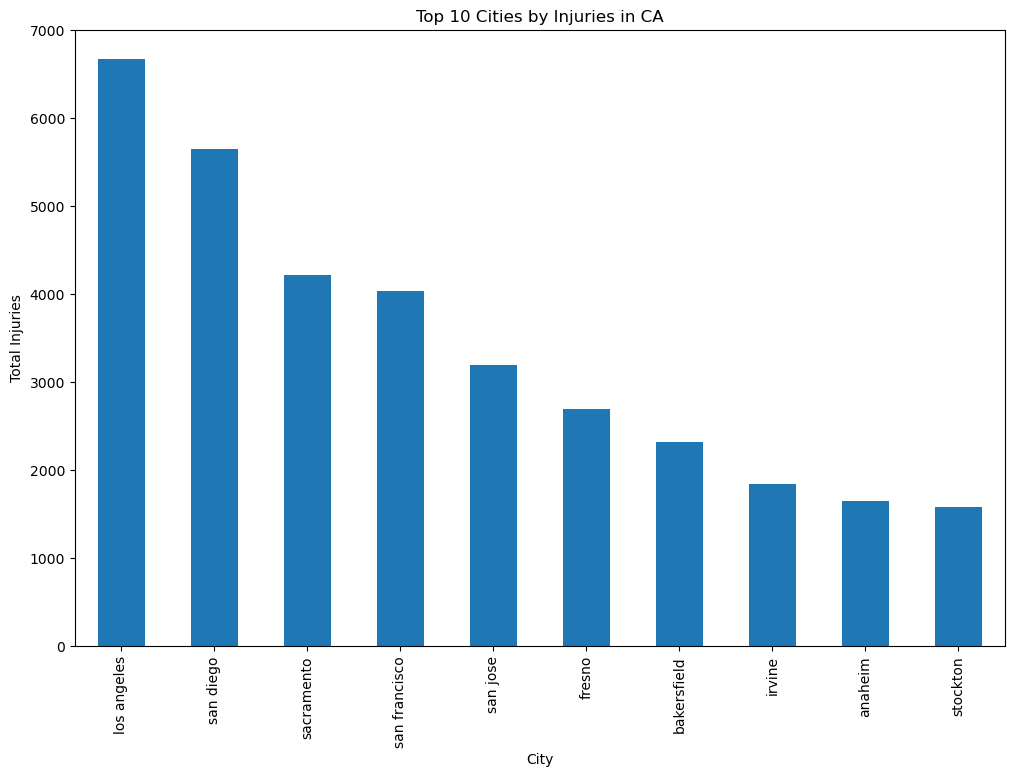

In [13]:
ca_data['city'] = ca_data['city'].str.lower()
injuries_by_city = ca_data.groupby('city')['no_injuries_illnesses'].sum().sort_values(ascending=False)

injuries_by_city.head(10).plot(kind='bar', figsize=(12, 8))
plt.xlabel('City')
plt.ylabel('Total Injuries')
plt.title('Top 10 Cities by Injuries in CA')
plt.show()

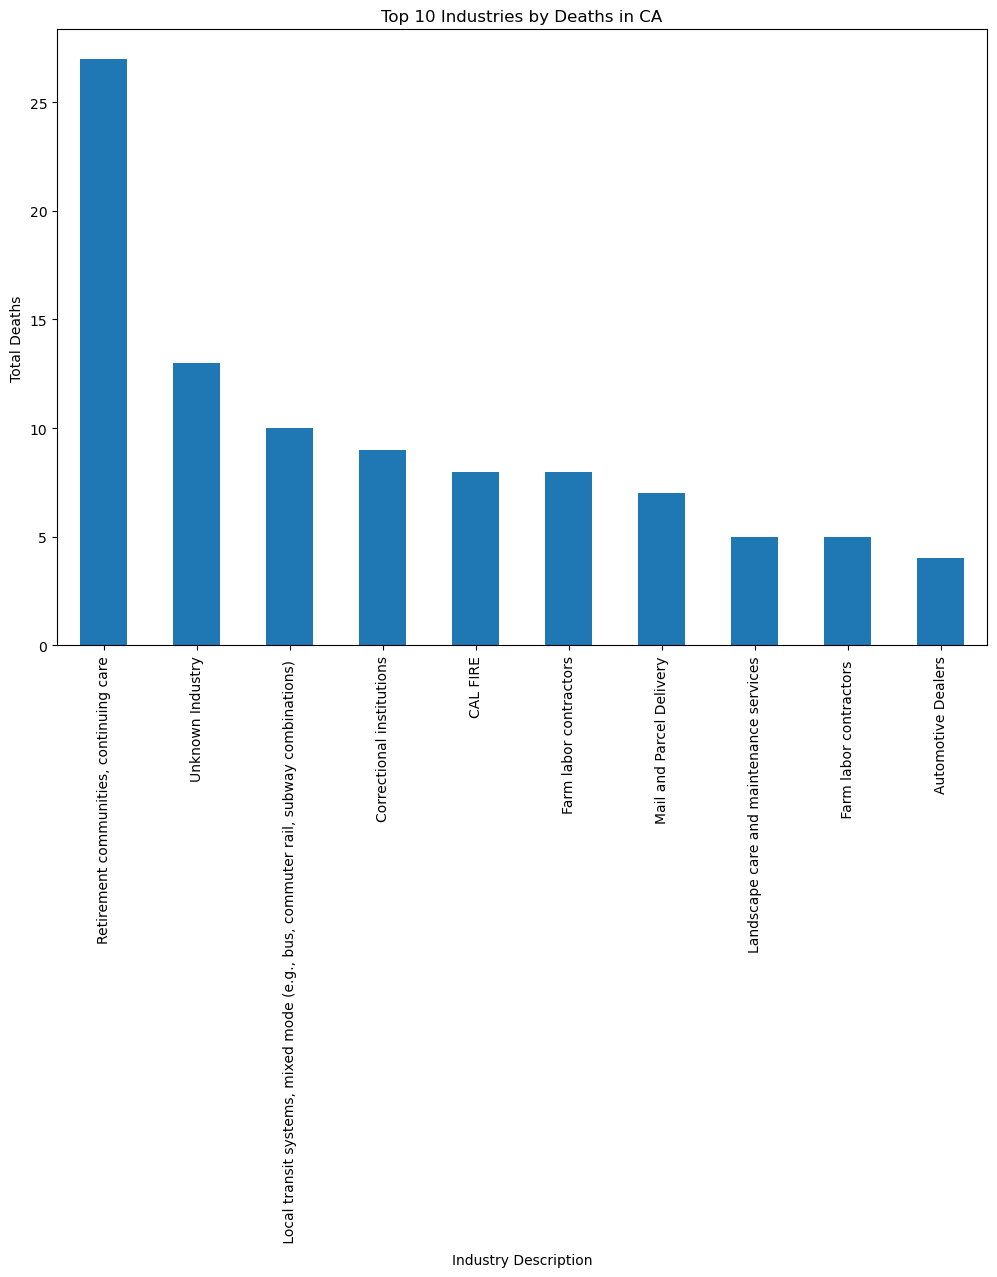

In [14]:
deaths_by_industry = ca_data.groupby('industry_description')['total_deaths'].sum().sort_values(ascending=False)

deaths_by_industry.head(10).plot(kind='bar', figsize=(12, 8))
plt.xlabel('Industry Description')
plt.ylabel('Total Deaths')
plt.title('Top 10 Industries by Deaths in CA')
plt.show()


In [15]:
safest_industries = ca_data[ca_data['total_injuries'] == 0]['industry_description'].value_counts()

print("Safest Industries (No Injuries Reported):")
print(safest_industries)

Safest Industries (No Injuries Reported):
industry_description
Unknown Industry                                                           4223
Food Service Contractors                                                   1120
Repair highway road street bridge or airport runway                         917
Offices of Physicians (except Mental Health Specialists)                    761
Office Equipment                                                            749
                                                                           ... 
Caisson (i.e., marine or pneumatic structures) construction                   1
Timber                                                                        1
 Cleaning building interiors during and immediately after construction        1
Analyzers, industrial process control type, manufacturing                     1
 Bus terminal operation, independent                                          1
Name: count, Length: 5945, dtype: int64


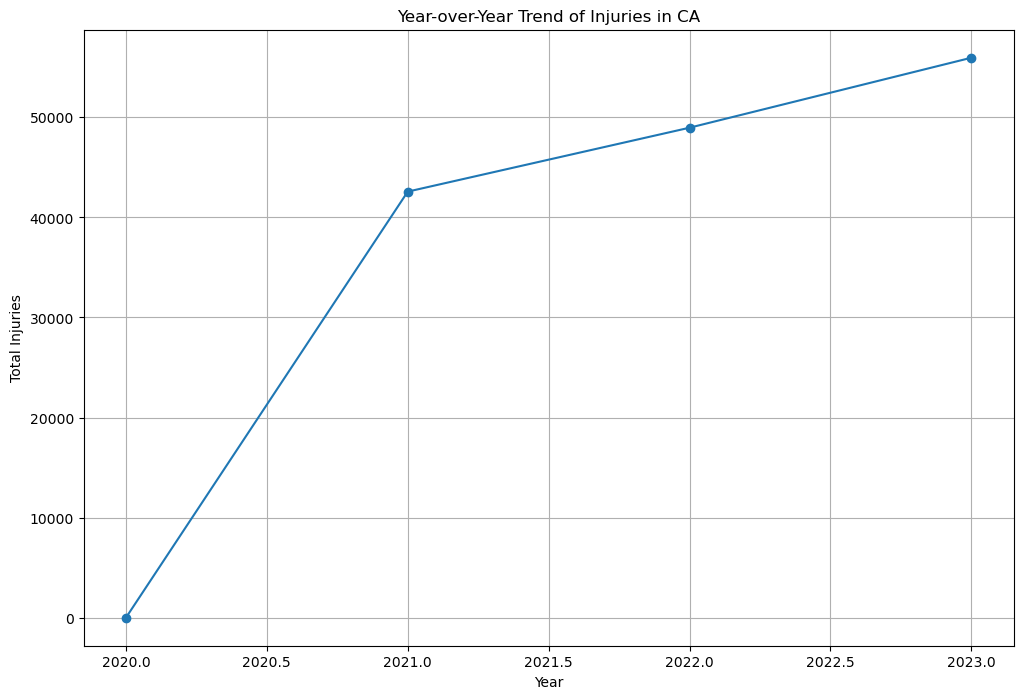

In [16]:
injuries_by_year = ca_data.groupby('year_filing_for')['no_injuries_illnesses'].sum()

injuries_by_year.plot(kind='line', figsize=(12, 8), marker='o')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.title('Year-over-Year Trend of Injuries in CA')
plt.grid(True)
plt.show()


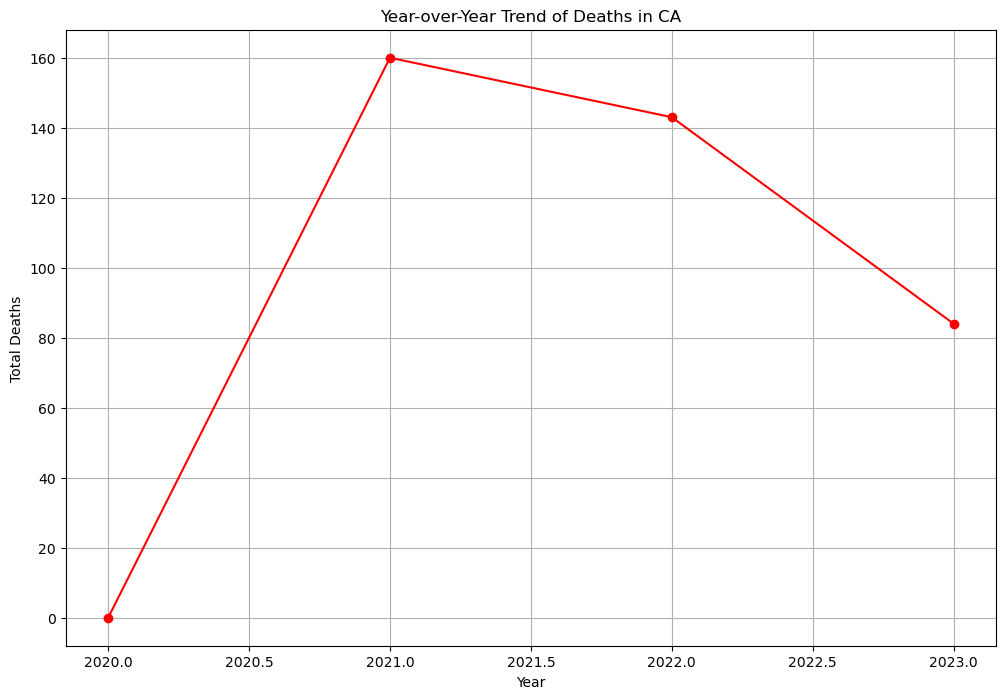

In [17]:
deaths_by_year = ca_data.groupby('year_filing_for')['total_deaths'].sum()


deaths_by_year.plot(kind='line', figsize=(12, 8), marker='o', color='red')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Year-over-Year Trend of Deaths in CA')
plt.grid(True)
plt.show()


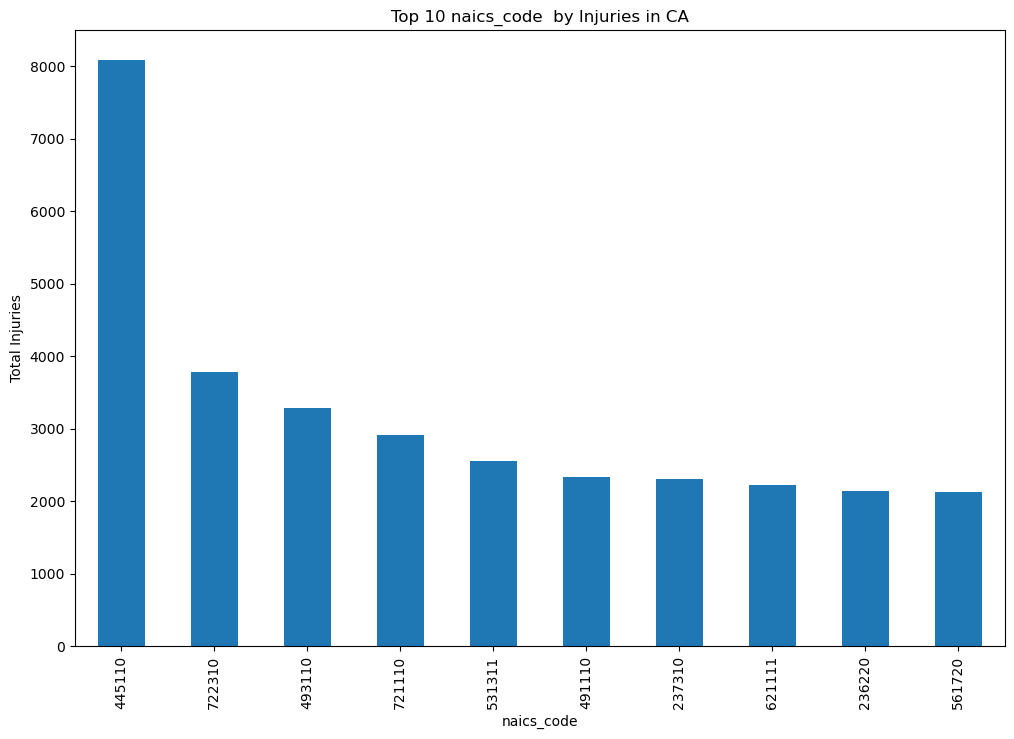

In [18]:
injuries_by_naics_code = ca_data.groupby('naics_code')['no_injuries_illnesses'].sum().sort_values(ascending=False)

injuries_by_naics_code.head(10).plot(kind='bar', figsize=(12, 8))
plt.xlabel('naics_code')
plt.ylabel('Total Injuries')
plt.title('Top 10 naics_code  by Injuries in CA')
plt.show()